In [64]:
!pip3 install numpy pandas matplotlib sklearn tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [100]:
data_path = r'data.csv'
df = pd.read_csv(data_path)

df = df.iloc[::-1]

In [101]:
def rate_of_change(column, steps, bl):
    
    column_temp = np.array(column.copy())
    column = np.array(column)
    for i in range (steps):
        column_temp = np.delete(column_temp, 0)
        column_temp = np.append(column_temp, 0)
        
    if bl:
        return pd.Series(column_temp - column).astype(int)
    else:
        return pd.Series(column_temp - column)


def remove_step(column, steps):

    for i in range (steps):
        column = np.delete(column, -1)
        
    return column


def remove_last_row(size, step):
    return [i for i in range(size-1,size-step-1,-1)]

In [102]:
step = 1

y = rate_of_change(df['index'],step,1)
x = df.drop(columns = [df1.columns[0], 'index'])

for column in x.columns:
    x[column] = rate_of_change(df[column],step,0)
    
y = y.drop(remove_last_row(y.size,step))
x = x.drop(remove_last_row(y.size,step))

y = y.reset_index(drop=True)
x = x.reset_index(drop=True)

In [103]:
x_values = [i for i in range(y.size)]

cv_size = 10

split = np.array_split(x_values, cv_size)

def predictions(x,y,model,size = cv_size, split = split):
    
    predicted = []

    for i in range(cv_size):
        xc = x.copy()
        yc = y.copy()
        cv_split = split[i].tolist()
        y_test = yc.iloc[cv_split]
        x_test = xc.iloc[cv_split]
        y_train = yc.drop(cv_split)
        x_train = xc.drop(cv_split)
        model.fit(x_train,y_train)
        predicted += model.predict(x_test).tolist()
        
    return np.array(predicted).cumsum()

In [110]:
# trying out different regressor/classification models
# I don't know if any of this is actually helpful

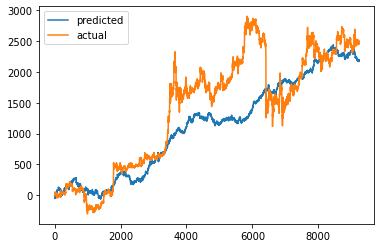

In [104]:
from sklearn.ensemble import RandomForestRegressor


RFG = predictions(x,y,RandomForestRegressor())


plt.plot(x_values, RFG)
plt.plot(x_values, y.copy().cumsum())

plt.legend(["predicted", "actual"])

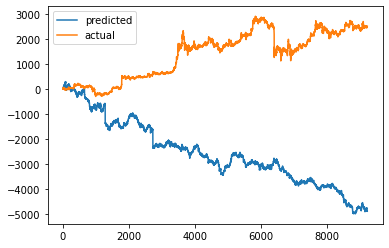

In [105]:
from sklearn.ensemble import RandomForestClassifier


RFC = predictions(x,y,RandomForestClassifier())


plt.plot(x_values, RFC)
plt.plot(x_values, y.copy().cumsum())

plt.legend(["predicted", "actual"])

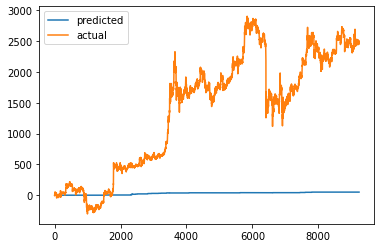

In [106]:
from sklearn.svm import SVC

svc = predictions(x,y, SVC(kernel = 'rbf'))

plt.plot(x_values, svc)
plt.plot(x_values, y.cumsum())

plt.legend(["predicted", "actual"])

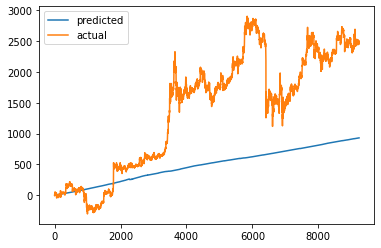

In [107]:
from sklearn.svm import SVR

svr = predictions(x,y, SVR(kernel = 'rbf'))

plt.plot(x_values, svr)
plt.plot(x_values, y.cumsum())

plt.legend(["predicted", "actual"])

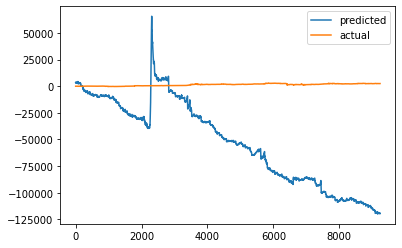

In [108]:
from sklearn.svm import SVR

svr = predictions(x,y, SVR(kernel = 'sigmoid'))

plt.plot(x_values, svr)
plt.plot(x_values, y.cumsum())

plt.legend(["predicted", "actual"])

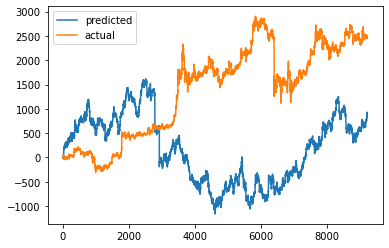

In [109]:
from sklearn.tree import DecisionTreeClassifier 

DTC = predictions(x,y, DecisionTreeClassifier(criterion = 'entropy'))

plt.plot(x_values, DTC)
plt.plot(x_values, y.cumsum())

plt.legend(["predicted", "actual"])

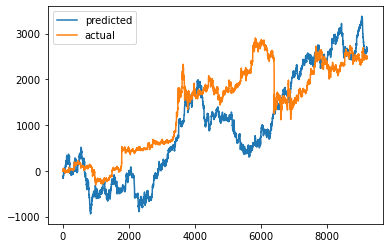

In [110]:
from sklearn.tree import DecisionTreeRegressor 

DTR = predictions(x,y, DecisionTreeRegressor())

plt.plot(x_values, DTR)
plt.plot(x_values, y.cumsum())

plt.legend(["predicted", "actual"])

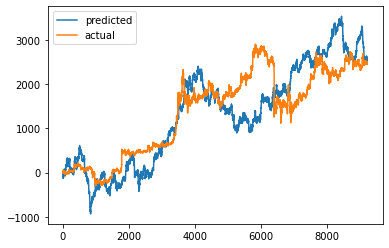

In [111]:
from sklearn.tree import DecisionTreeRegressor 

DTRf = predictions(x,y, DecisionTreeRegressor(criterion = 'friedman_mse'))

plt.plot(x_values, DTRf)
plt.plot(x_values, y.cumsum())

plt.legend(["predicted", "actual"])

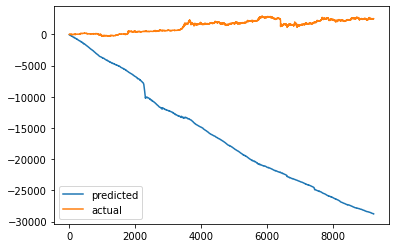

In [112]:
from sklearn.svm import SVC

svc1 = predictions(x,y, SVC(kernel = 'sigmoid'))

plt.plot(x_values, svc1)
plt.plot(x_values, y.cumsum())

plt.legend(["predicted", "actual"])

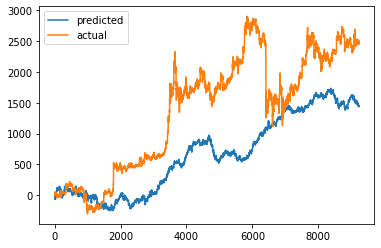

In [113]:
from sklearn.ensemble import ExtraTreesRegressor


ETR = predictions(x,y,ExtraTreesRegressor())


plt.plot(x_values, ETR)
plt.plot(x_values, y.copy().cumsum())

plt.legend(["predicted", "actual"])

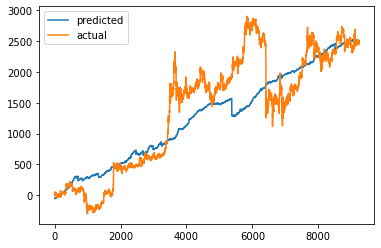

In [114]:
from sklearn.ensemble import GradientBoostingRegressor


GBR = predictions(x,y,GradientBoostingRegressor())


plt.plot(x_values, GBR)
plt.plot(x_values, y.copy().cumsum())

plt.legend(["predicted", "actual"])

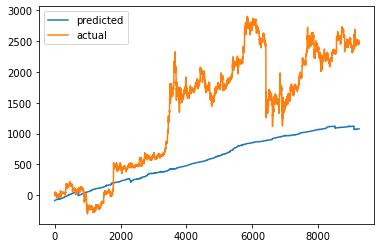

In [115]:
from sklearn.ensemble import GradientBoostingRegressor


GBR = predictions(x,y,GradientBoostingRegressor(loss = 'lad'))


plt.plot(x_values, GBR)
plt.plot(x_values, y.copy().cumsum())

plt.legend(["predicted", "actual"])

In [119]:
# ann regressor

def nn_predictions(x,y,model,size = cv_size, split = split):
    
    predicted = []

    for i in range(cv_size):
        xc = x.copy()
        yc = y.copy()
        cv_split = split[i].tolist()
        y_test = yc[cv_split[0]:cv_split[-1]+1]
        x_test = xc[cv_split[0]:cv_split[-1]+1]
        y_train = yc[:cv_split[0]] + yc[cv_split[-1]+1:]
        x_train = xc[:cv_split[0]] + xc[cv_split[-1]+1:]
        model.fit(np.array(x_train),np.array(y_train), batch_size = 32, epochs = 100)
        predicted += model.predict(np.array(x_test)).tolist()
        
    return np.array(predicted).cumsum()

In [120]:
y0 = rate_of_change(df['index'],step,0)
y0 = y0.drop(remove_last_row(y0.size,step))
y0 = y0.reset_index(drop=True)

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

neural_net = nn_predictions(x.values.tolist(),y0.tolist(),ann)

Epoch 1/100
8314/8314 [==============================] - 1s 83us/sample - loss: 512.7962
Epoch 2/100
8314/8314 [==============================] - 0s 43us/sample - loss: 512.7620
Epoch 3/100
8314/8314 [==============================] - 0s 47us/sample - loss: 512.7476
Epoch 4/100
8314/8314 [==============================] - 0s 42us/sample - loss: 512.7445
Epoch 5/100
8314/8314 [==============================] - 0s 41us/sample - loss: 512.7385
Epoch 6/100
8314/8314 [==============================] - 0s 40us/sample - loss: 512.7274
Epoch 7/100
8314/8314 [==============================] - 0s 43us/sample - loss: 512.7226
Epoch 8/100
8314/8314 [==============================] - 0s 41us/sample - loss: 512.7178
Epoch 9/100
8314/8314 [==============================] - 0s 42us/sample - loss: 512.7208
Epoch 10/100
8314/8314 [==============================] - 0s 40us/sample - loss: 512.7180
Epoch 11/100
8314/8314 [==============================] - 0s 41us/sample - loss: 512.7126
Epoch 12/100
8314/8

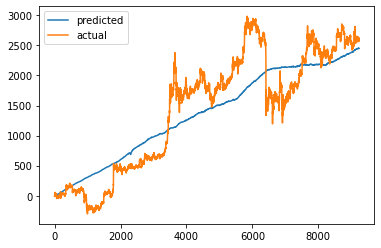

In [121]:
plt.plot(x_values, neural_net)
plt.plot(x_values, y0.copy().cumsum())

plt.legend(["predicted", "actual"])

In [122]:
# F_one testing on the models that look good

def precision(y, predicted):
    true_pos = 0
    actual = 0
    for i in range(len(predicted)):
        if predicted[i] > 0:
            if y[i] > 0:
                true_pos += 1
            actual += 1
    return true_pos/actual



def recall(y,predicted):
    true_pos = 0
    actual = 0
    for i in range(len(predicted)):
        if y[i] > 0:
            if predicted[i] > 0:
                true_pos += 1
            actual += 1
    return true_pos/actual


def Fone(y,predicted):
    p = precision(y,predicted)
    r = recall(y,predicted)
    return 2 * (p * r)/(p + r)

x_values = [i for i in range(y.size)]

cv_size = 10

split = np.array_split(x_values, cv_size)


def new_predictions(x,y,model,size = cv_size, split = split):
    
    predicted = []

    for i in range(cv_size):
        xc = x.copy()
        yc = y.copy()
        cv_split = split[i].tolist()
        y_test = yc.iloc[cv_split]
        x_test = xc.iloc[cv_split]
        y_train = yc.drop(cv_split)
        x_train = xc.drop(cv_split)
        model.fit(x_train,y_train)
        predicted += model.predict(x_test).tolist()
        
    return predicted    

In [123]:
from sklearn.ensemble import RandomForestRegressor


RFG = new_predictions(x,y,RandomForestRegressor())


print(Fone(y.copy().tolist(), RFG))

0.5128314798973481


In [124]:
from sklearn.ensemble import ExtraTreesRegressor


ETR = new_predictions(x,y,ExtraTreesRegressor())


print(Fone(y.copy().tolist(), ETR))

0.506117192530586


In [125]:
from sklearn.tree import DecisionTreeClassifier 

DTC = new_predictions(x,y, DecisionTreeClassifier(criterion = 'entropy'))

print(Fone(y.copy().tolist(), DTC))

0.4885906040268457


In [126]:
from sklearn.ensemble import GradientBoostingRegressor


GBR = new_predictions(x,y,GradientBoostingRegressor())


print(Fone(y.copy().tolist(), GBR))

0.546323385995709


In [127]:
from sklearn.ensemble import GradientBoostingRegressor


GBR2 = new_predictions(x,y,GradientBoostingRegressor(loss = 'lad'))


print(Fone(y.copy().tolist(), GBR2))

0.5682871422080873


In [135]:
from sklearn.inspection import permutation_importance

model = GradientBoostingRegressor()

model.fit(x,y)

r = permutation_importance(model, x, y, n_repeats=10,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{x.columns[i]}:" f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")



sentiment:0.189 +/- 0.006
vxbt:0.044 +/- 0.002
tweet_vol:0.034 +/- 0.001


In [136]:
step = 1

# only applying dy/dx to vxbt and leaving sentiment and volume untouched

y2 = rate_of_change(df['index'],step,1)
x2 = df.drop(columns = [df.columns[0], 'index'])

x2['sentiment'] = rate_of_change(df['sentiment'],step,0)
    
y2 = y2.drop(remove_last_row(y2.size,step))
x2 = x2.drop(remove_last_row(y2.size,step))

y2 = y2.reset_index(drop=True)
x2 = x2.reset_index(drop=True)

In [137]:
from sklearn.inspection import permutation_importance

model = GradientBoostingRegressor()

model.fit(x2,y2)

r = permutation_importance(model, x2, y2, n_repeats=10,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{x2.columns[i]}:" f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

vxbt:0.234 +/- 0.013
tweet_vol:0.178 +/- 0.007
sentiment:0.143 +/- 0.007


In [138]:
from sklearn.ensemble import GradientBoostingRegressor

GBR3 = new_predictions(x2,y2,GradientBoostingRegressor())

print(Fone(y.copy().tolist(), GBR3))

0.5766904396497246


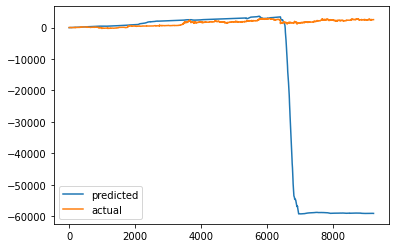

In [139]:
from sklearn.ensemble import GradientBoostingRegressor


GBR4 = predictions(x2,y2,GradientBoostingRegressor())


plt.plot(x_values, GBR4)
plt.plot(x_values, y2.copy().cumsum())

plt.legend(["predicted", "actual"])

In [ ]:
# Uhhh something probably went wrong here because 
# Im combining a continous series with a rate of change one
# I think